Lambda School Data Science

*Unit 2, Sprint 2, Module 2*

---

# Random Forests

## Assignment
- [ ] Read [“Adopting a Hypothesis-Driven Workflow”](https://outline.com/5S5tsB), a blog post by a Lambda DS student about the Tanzania Waterpumps challenge.
- [ ] Continue to participate in our Kaggle challenge.
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features.
- [ ] Try Ordinal Encoding.
- [ ] Try a Random Forest Classifier.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

## Stretch Goals

### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Do more exploratory data analysis, data cleaning, feature engineering, and feature selection.
- [ ] Try other [categorical encodings](https://contrib.scikit-learn.org/categorical-encoding/).
- [ ] Get and plot your feature importances.
- [ ] Make visualizations and share on Slack.

### Reading

Top recommendations in _**bold italic:**_

#### Decision Trees
- A Visual Introduction to Machine Learning, [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/),  and _**[Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)**_
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU)

#### Random Forests
- [_An Introduction to Statistical Learning_](http://www-bcf.usc.edu/~gareth/ISL/), Chapter 8: Tree-Based Methods
- [Coloring with Random Forests](http://structuringtheunstructured.blogspot.com/2017/11/coloring-with-random-forests.html)
- _**[Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)**_

#### Categorical encoding for trees
- [Are categorical variables getting lost in your random forests?](https://roamanalytics.com/2016/10/28/are-categorical-variables-getting-lost-in-your-random-forests/)
- [Beyond One-Hot: An Exploration of Categorical Variables](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/)
- _**[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)**_
- _**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)**_
- [Mean (likelihood) encodings: a comprehensive study](https://www.kaggle.com/vprokopev/mean-likelihood-encodings-a-comprehensive-study)
- [The Mechanics of Machine Learning, Chapter 6: Categorically Speaking](https://mlbook.explained.ai/catvars.html)

#### Imposter Syndrome
- [Effort Shock and Reward Shock (How The Karate Kid Ruined The Modern World)](http://www.tempobook.com/2014/07/09/effort-shock-and-reward-shock/)
- [How to manage impostor syndrome in data science](https://towardsdatascience.com/how-to-manage-impostor-syndrome-in-data-science-ad814809f068)
- ["I am not a real data scientist"](https://brohrer.github.io/imposter_syndrome.html)
- _**[Imposter Syndrome in Data Science](https://caitlinhudon.com/2018/01/19/imposter-syndrome-in-data-science/)**_


### More Categorical Encodings

**1.** The article **[Categorical Features and Encoding in Decision Trees](https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)** mentions 4 encodings:

- **"Categorical Encoding":** This means using the raw categorical values as-is, not encoded. Scikit-learn doesn't support this, but some tree algorithm implementations do. For example, [Catboost](https://catboost.ai/), or R's [rpart](https://cran.r-project.org/web/packages/rpart/index.html) package.
- **Numeric Encoding:** Synonymous with Label Encoding, or "Ordinal" Encoding with random order. We can use [category_encoders.OrdinalEncoder](https://contrib.scikit-learn.org/categorical-encoding/ordinal.html).
- **One-Hot Encoding:** We can use [category_encoders.OneHotEncoder](http://contrib.scikit-learn.org/categorical-encoding/onehot.html).
- **Binary Encoding:** We can use [category_encoders.BinaryEncoder](http://contrib.scikit-learn.org/categorical-encoding/binary.html).


**2.** The short video 
**[Coursera — How to Win a Data Science Competition: Learn from Top Kagglers — Concept of mean encoding](https://www.coursera.org/lecture/competitive-data-science/concept-of-mean-encoding-b5Gxv)** introduces an interesting idea: use both X _and_ y to encode categoricals.

Category Encoders has multiple implementations of this general concept:

- [CatBoost Encoder](http://contrib.scikit-learn.org/categorical-encoding/catboost.html)
- [James-Stein Encoder](http://contrib.scikit-learn.org/categorical-encoding/jamesstein.html)
- [Leave One Out](http://contrib.scikit-learn.org/categorical-encoding/leaveoneout.html)
- [M-estimate](http://contrib.scikit-learn.org/categorical-encoding/mestimate.html)
- [Target Encoder](http://contrib.scikit-learn.org/categorical-encoding/targetencoder.html)
- [Weight of Evidence](http://contrib.scikit-learn.org/categorical-encoding/woe.html)

Category Encoder's mean encoding implementations work for regression problems or binary classification problems. 

For multi-class classification problems, you will need to temporarily reformulate it as binary classification. For example:

```python
encoder = ce.TargetEncoder(min_samples_leaf=..., smoothing=...) # Both parameters > 1 to avoid overfitting
X_train_encoded = encoder.fit_transform(X_train, y_train=='functional')
X_val_encoded = encoder.transform(X_train, y_val=='functional')
```

For this reason, mean encoding won't work well within pipelines for multi-class classification problems.

**3.** The **[dirty_cat](https://dirty-cat.github.io/stable/)** library has a Target Encoder implementation that works with multi-class classification.

```python
 dirty_cat.TargetEncoder(clf_type='multiclass-clf')
```
It also implements an interesting idea called ["Similarity Encoder" for dirty categories](https://www.slideshare.net/GaelVaroquaux/machine-learning-on-non-curated-data-154905090).

However, it seems like dirty_cat doesn't handle missing values or unknown categories as well as category_encoders does. And you may need to use it with one column at a time, instead of with your whole dataframe.

**4. [Embeddings](https://www.kaggle.com/learn/embeddings)** can work well with sparse / high cardinality categoricals.

_**I hope it’s not too frustrating or confusing that there’s not one “canonical” way to encode categoricals. It’s an active area of research and experimentation! Maybe you can make your own contributions!**_

### Setup

You can work locally (follow the [local setup instructions](https://lambdaschool.github.io/ds/unit2/local/)) or on Colab (run the code cell below).

In [0]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [45]:
# Feature engineering: cluster the latitude and longitude coordinates
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
train['cluster'] = kmeans.fit_predict(train[['longitude', 'latitude']])
test['cluster'] = kmeans.predict(test[['longitude', 'latitude']])

# show the results
import plotly.express as px
px.scatter(train, x='longitude', y='latitude', color='cluster')

In [46]:
# Split train into train and validation
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

train.shape, val.shape, test.shape

((47520, 42), (11880, 42), (14358, 41))

In [0]:
# Data wrangling I already had from the lectures and yesterday's assignment
import numpy as np

def wrangle(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    # So we will replace the zeros with nulls, and impute missing values later.
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)
            
    # quantity & quantity_group are duplicates, so drop one
    X = X.drop(columns='quantity_group')

    # payment & payment_type are duplicates, so drop one
    X = X.drop(columns='payment')

    # 'amount_tsh' is 70% 0's, replace those with the mean of all 
    # non-zero values, minus the top 1% (found during exploration)
    X['amount_tsh'] = X['amount_tsh'].replace(0, 641.5)

    # Region code and district code should be categorical (cardinalies 27 & 20)
    X['region_code'] = X['region_code'].astype(str)
    X['district_code'] = X['district_code'].astype(str)

    # Construction year shouldn't have zero's, replace with the non-zero mean
    X['construction_year'] = X['construction_year'].replace(0, 1997)

    # We want to treat the new cluster column as categorical
    X['cluster'] = X['cluster'].astype(str)
    
    # return the wrangled dataframe
    return X


train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

### Results from yesterday

In [0]:
# Imports
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
# Select features
target = 'status_group'

# exclude the target and 'id' columns
train_features = train.drop(columns=[target, 'id'])

# numeric features
numeric = train_features.select_dtypes(include='number').columns.tolist()

# categorical features with cardinality <= 50
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical = cardinality[cardinality <= 50].index.tolist()

# combine for the final feature selection
features = numeric + categorical
print('Count:', len(features))
print(features)

# Get the X features matrix and y target vector
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]

Count: 30
['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year', 'basin', 'region', 'region_code', 'district_code', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'cluster']


In [50]:
# Decision tree classifier with one-hot encoding
pipe = make_pipeline(ce.OneHotEncoder(use_cat_names=True),
                     SimpleImputer(strategy='mean'),
                     StandardScaler(),
                     DecisionTreeClassifier(max_depth=30, min_samples_leaf=10))

# Fit everything on train
pipe.fit(X_train, y_train)

# Get training and validation scores
print('Train Accuracy', pipe.score(X_train, y_train))
print('Validation Accuracy', pipe.score(X_val, y_val))

Train Accuracy 0.8364057239057239
Validation Accuracy 0.7701178451178451


### Objective: Try ordinal encoding

In [0]:
# Arrange data so we use all features
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [22]:
# Decision tree classifier with ordinal encoding
pipe = make_pipeline(ce.OrdinalEncoder(),
                     SimpleImputer(strategy='mean'),
                     StandardScaler(),
                     DecisionTreeClassifier(max_depth=30, min_samples_leaf=10))

# Fit
pipe.fit(X_train, y_train)

# Get scores
print('Train Accuracy', pipe.score(X_train, y_train))
print('Validation Accuracy', pipe.score(X_val, y_val))

Train Accuracy 0.8445075757575757
Validation Accuracy 0.7638888888888888


### Objective: Try a Random Forest Classifier

In [23]:
# Random forest classifier with ordinal encoding, no scaling
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 1.0
Validation Accuracy: 0.8127104377104377


### Feature engineering: predicting missing data

What if I use regression to fill in some of the blanks?

In [0]:
# Starting from scratch to make the process easier to follow
train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')

# Feature engineering: cluster the latitude and longitude coordinates
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=20)
train['cluster'] = kmeans.fit_predict(train[['longitude', 'latitude']])
test['cluster'] = kmeans.predict(test[['longitude', 'latitude']])

# split val from train
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['status_group'], random_state=42)

# different version of wrangle, assuming less of the missing data
def wrangle2(X):
    """Wrangle train, validate, and test sets in the same way"""
    
    # Prevent SettingWithCopyWarning
    X = X.copy()
    
    # About 3% of the time, latitude has small values near zero,
    # outside Tanzania, so we'll treat these values like zero.
    X['latitude'] = X['latitude'].replace(-2e-08, 0)
    
    # When columns have zeros and shouldn't, they are like null values.
    cols_with_zeros = ['longitude', 'latitude']
    for col in cols_with_zeros:
        X[col] = X[col].replace(0, np.nan)

    # Also replace construction_year 0's with nan
    X['construction_year'] = X['construction_year'].replace(0, np.nan)

    # 'amount_tsh' is 70% 0's, replace with nan
    X['amount_tsh'] = X['amount_tsh'].replace(0, np.nan)
            
    # drop duplicate columns
    X = X.drop(columns='quantity_group')
    X = X.drop(columns='payment')

    # These columns should be categorical, not numeric
    X['region_code'] = X['region_code'].astype(str)
    X['district_code'] = X['district_code'].astype(str)
    X['cluster'] = X['cluster'].astype(str)
    
    # return the wrangled dataframe
    return X

train = wrangle2(train)
val = wrangle2(val)
test = wrangle2(test)

In [0]:
# Arrange data so we use all features
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

In [59]:
# Try the experimental IterativeImputer, which imputes missing values by 
# modelling them after the other available data
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    IterativeImputer(),
    RandomForestClassifier(n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.9999789562289563
Validation Accuracy: 0.8088383838383838


In [57]:
nulls = train.isnull().sum()
nulls[nulls > 0]

amount_tsh           33265
funder                2904
installer             2917
longitude             1442
latitude              1442
subvillage             286
public_meeting        2644
scheme_management     3128
scheme_name          22532
permit                2443
construction_year    16517
dtype: int64

In [0]:
# What if I just drop the missing data from train?
before = len(train)
train_subset = train[(~train['construction_year'].isnull()) &
              (~train['latitude'].isnull()) &
              (~train['longitude'].isnull())]

In [62]:
nulls = train_subset.isnull().sum()
nulls[nulls > 0]

amount_tsh           17070
funder                1071
installer             1073
subvillage               8
public_meeting        1822
scheme_management     1991
scheme_name          12021
permit                1539
dtype: int64

In [66]:
# Arrange data
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

# make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    IterativeImputer(),
    RandomForestClassifier(n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.9999579124579124
Validation Accuracy: 0.8081649831649832


In [67]:
# Again but with SimpleImputer since it seems to be my best result so far
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

# make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 1.0
Validation Accuracy: 0.8128787878787879


### Trying different hyperparameters for the random forest model

In [0]:
# Try different n_estimators
results = []
for n in range(10, 500, 10):
  # make pipeline
  pipeline = make_pipeline(
      ce.OrdinalEncoder(),
      SimpleImputer(strategy='mean'),
      RandomForestClassifier(random_state=42, n_estimators=n, n_jobs=-1)
  )

  # Fit on train
  pipeline.fit(X_train, y_train)

  # Score
  train_score = pipeline.score(X_train, y_train)
  val_score = pipeline.score(X_val, y_val)

  # Save results
  results.append([n, train_score, val_score])

In [74]:
results_df = pd.DataFrame(results, columns=['n_estimators', 'train_score', 'val_score'])

import plotly.express as px
px.line(results_df, x='n_estimators', y='val_score')

In [75]:
# Try different random seeds
results2 = []
for n in range(0, 101, 10):
  # make pipeline
  pipeline = make_pipeline(
      ce.OrdinalEncoder(),
      SimpleImputer(strategy='mean'),
      RandomForestClassifier(random_state=n, n_jobs=-1)
  )

  # Fit on train
  pipeline.fit(X_train, y_train)

  # Score
  train_score = pipeline.score(X_train, y_train)
  val_score = pipeline.score(X_val, y_val)

  # Save results
  results2.append([n, train_score, val_score])

results_df2 = pd.DataFrame(results2, columns=['random_state', 'train_score', 'val_score'])

import plotly.express as px
px.line(results_df2, x='random_state', y='val_score')

In [76]:
# make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state=40, n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.9999789562289563
Validation Accuracy: 0.8133838383838384


In [0]:
# Predict on test
y_test = pipeline.predict(X_test)

# Export .csv
submission = test[['id']].copy()
submission[target] = y_test
submission.to_csv('jduke_water_pump_submission3.csv', index=False)

### Revisiting features

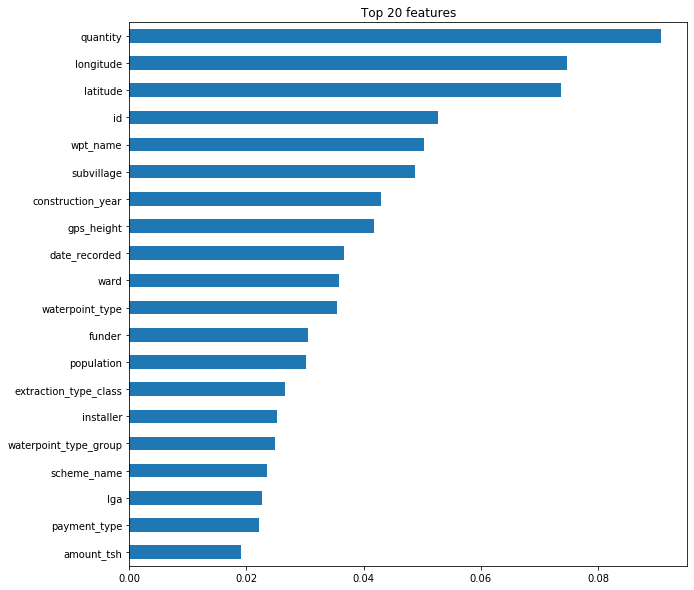

In [81]:
# Check feature importances to see which were used by the last model
import matplotlib.pyplot as plt

model = pipeline.named_steps['randomforestclassifier']
encoder = pipeline.named_steps['ordinalencoder']
encoded = encoder.transform(X_train)
importances = pd.Series(model.feature_importances_, encoded.columns)

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh();

In [114]:
from sklearn.neural_network import MLPClassifier

# make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    MLPClassifier(alpha=1, max_iter=1000)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.5861531986531987
Validation Accuracy: 0.5892255892255892


In [116]:
from sklearn.neighbors import KNeighborsClassifier

# make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    KNeighborsClassifier(n_neighbors=20)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.5941708754208754
Validation Accuracy: 0.5337542087542088


In [118]:
from sklearn.ensemble import GradientBoostingClassifier

# make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    GradientBoostingClassifier()
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.756165824915825
Validation Accuracy: 0.75


In [122]:
# make pipeline
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state=40, n_jobs=-1)
)

# Fit on train
pipeline.fit(X_train, y_train)

# Score
print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.9999789562289563
Validation Accuracy: 0.8133838383838384


In [133]:
# Re-fit my best result on both test and val
X_combo = pd.merge(X_train, X_val, how='outer')
y_combo = pd.concat([y_train, y_val])
pipeline.fit(X_combo, y_combo)

# Score
print('Combined Accuracy:', pipeline.score(X_combo, y_combo))

Combined Accuracy: 0.99996632996633


In [0]:
# Export .csv
submission = test[['id']].copy()
submission[target] = y_test
submission.to_csv('jduke_water_pump_submission4.csv', index=False)